<h1 align="center" style="color:#E80F88;">Inventory Demand Forecasting</h1>

#### Inventory forecasting is a method used to predict inventory levels for a future time period. It also helps keep track of sales and demand so you can better manage your purchase orders. In this , we will try to implement a machine learning model which can predict the sales for the different products which are sold in different stores.

By accurately predicting sales, businesses can adjust their inventory levels accordingly to meet customer demand while minimizing excess inventory or stockouts.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from xgboost import XGBRegressor 

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

<h1 style="color:#982176;">Data Collection</h1>

In [3]:
df = pd.read_csv('SuperStore_Sales_Dataset.csv')
df

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode
0,4918,CA-2019-160304,01-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.940,1,28.2668,0,Online
1,4919,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.940,3,38.2668,0,Online
2,4920,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.980,2,67.2742,0,Cards
3,3074,CA-2019-125206,03-01-2019,05-01-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.460,2,28.6150,0,Online
4,8604,US-2019-116365,03-01-2019,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Central,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.080,2,-5.2640,0,Online
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5896,907,CA-2020-143259,30-12-2020,03-01-2021,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",213.136,4,12.1176,0,COD
5897,1297,CA-2020-115427,30-12-2020,03-01-2021,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",295.904,2,4.5188,1,Online
5898,5092,CA-2020-156720,30-12-2020,03-01-2021,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,...,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,388.024,3,-0.6048,0,Online
5899,909,CA-2020-143259,30-12-2020,03-01-2021,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,462.776,3,19.7910,0,COD


In [3]:
df.head()

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode
0,4918,CA-2019-160304,01-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,0,Online
1,4919,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,0,Online
2,4920,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.98,2,67.2742,0,Cards
3,3074,CA-2019-125206,03-01-2019,05-01-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,0,Online
4,8604,US-2019-116365,03-01-2019,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Central,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,0,Online


In [50]:
#First I will perform a preliminary analysis to understand the structure and types of data columns

In [4]:
df.shape

(5901, 21)

In [5]:
df.size

123921

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Row ID+O6G3A1:R6  5901 non-null   int64  
 1   Order ID          5901 non-null   object 
 2   Order Date        5901 non-null   object 
 3   Ship Date         5901 non-null   object 
 4   Ship Mode         5901 non-null   object 
 5   Customer ID       5901 non-null   object 
 6   Customer Name     5901 non-null   object 
 7   Segment           5901 non-null   object 
 8   Country           5901 non-null   object 
 9   City              5901 non-null   object 
 10  State             5901 non-null   object 
 11  Region            5901 non-null   object 
 12  Product ID        5901 non-null   object 
 13  Category          5901 non-null   object 
 14  Sub-Category      5901 non-null   object 
 15  Product Name      5901 non-null   object 
 16  Sales             5901 non-null   float64


In [7]:
df.describe()

,Row ID+O6G3A1:R6,Sales,Quantity,Profit,Returns
count,5901.000000,5901.000000,5901.000000,5901.000000,5901.000000
mean,5022.422471,265.345589,3.781901,29.700408,0.048636
std,2877.977184,474.260645,2.212917,259.589138,0.215124
min,1.000000,0.836000,1.000000,-6599.978000,0.000000
25%,2486.000000,71.976000,2.000000,1.795500,0.000000
50%,5091.000000,128.648000,3.000000,8.502500,0.000000
75%,7456.000000,265.170000,5.000000,28.615000,0.000000
max,9994.000000,9099.930000,14.000000,8399.976000,1.000000


In [51]:
df['Category'].nunique()

3

In [52]:
df['Category'].value_counts()    #Occurances of each unique value

1    3569
0    1249
2    1083
Name: Category, dtype: int64

In [53]:
df['Country'].value_counts()

0    5901
Name: Country, dtype: int64

In [54]:
df['Sub-Category'].value_counts()

3     915
12    825
9     573
13    519
14    498
2     465
0     461
5     355
1     279
10    211
16    190
7     133
4     131
8     124
15    119
11     65
6      38
Name: Sub-Category, dtype: int64

In [4]:
df['Sales'].nunique()

5109

In [55]:
df['Sales'].value_counts()

12.960      17
32.400       9
10.368       9
25.920       8
15.552       7
            ..
3.690        1
4.356        1
9.328        1
9.392        1
2975.510     1
Name: Sales, Length: 5109, dtype: int64

<h1 style="color:#982176;">Data Cleaning</h1>

In [8]:
#Checking if there are any missing value

In [5]:
df.isnull()

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5896,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5897,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5898,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5899,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

Row ID+O6G3A1:R6    0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country             0
City                0
State               0
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Profit              0
Returns             0
Payment Mode        0
dtype: int64

In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5896    False
5897    False
5898    False
5899    False
5900    False
Length: 5901, dtype: bool

In [3]:
df.duplicated().sum()

0

<h1 style="color:#982176;">Checking Outliers</h1>

<Axes: xlabel='Profit'>

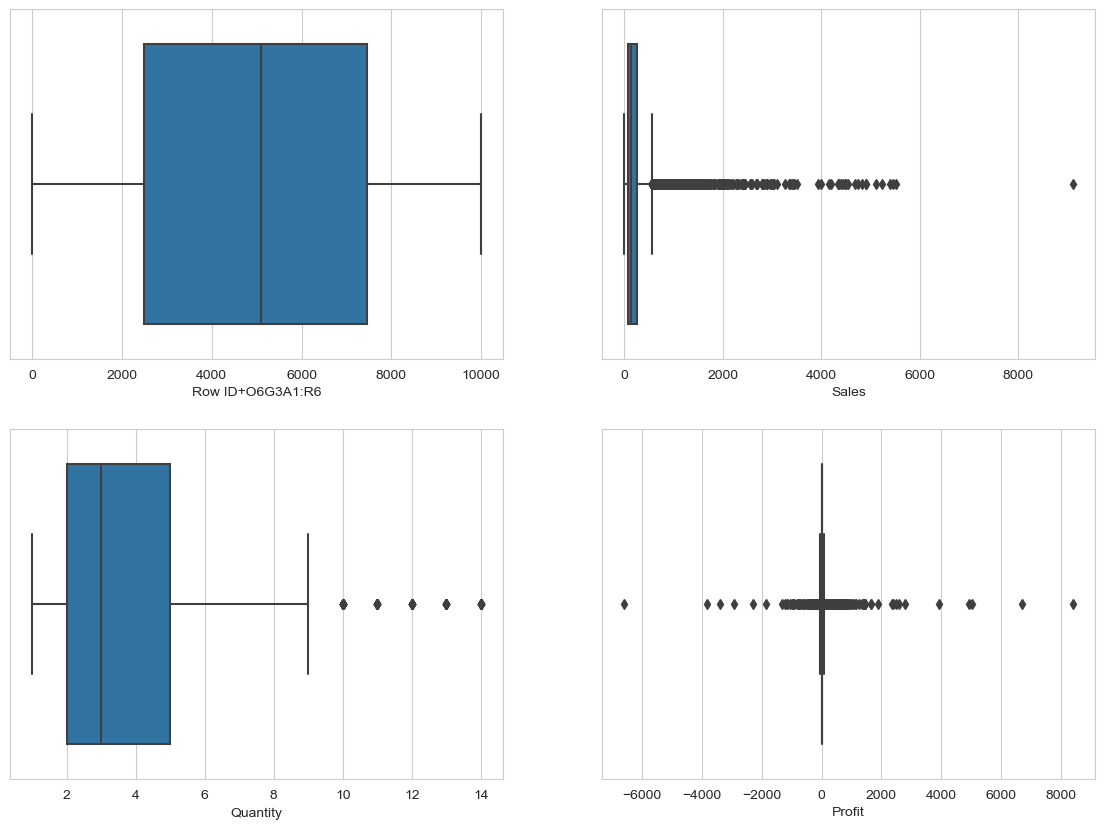

In [4]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,2,1)
sns.boxplot(x='Row ID+O6G3A1:R6',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='Sales',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='Quantity',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='Profit',data=df)

In [5]:
# Function to remove outliers from a DataFrame column
def remove_outliers(df, column):
    mean = df[column].mean()
    std = df[column].std()
    upper_bound = mean + 3 * std
    lower_bound = mean - 3 * std
    outliers = df[(df[column] > upper_bound) | (df[column] < lower_bound)]
    df = df[(df[column] <= upper_bound) & (df[column] >= lower_bound)]
    return df, len(outliers)

# Columns for outlier removal
columns = ['Sales', 'Quantity', 'Profit']

# Loop through columns to remove outliers
for column in columns:
    print(f'Before removing outliers for {column}:', len(df))
    df, outliers_count = remove_outliers(df, column)
    print(f'Outliers for {column}:', outliers_count)
    print(f'After removing outliers for {column}:', len(df))

Before removing outliers for Sales: 5901
Outliers for Sales: 106
After removing outliers for Sales: 5795
Before removing outliers for Quantity: 5795
Outliers for Quantity: 50
After removing outliers for Quantity: 5745
Before removing outliers for Profit: 5745
Outliers for Profit: 43
After removing outliers for Profit: 5702


<h1 style="color:#982176;">Exploratory Data Analysis(EDA)</h1>

In [10]:
pip install wordcloud

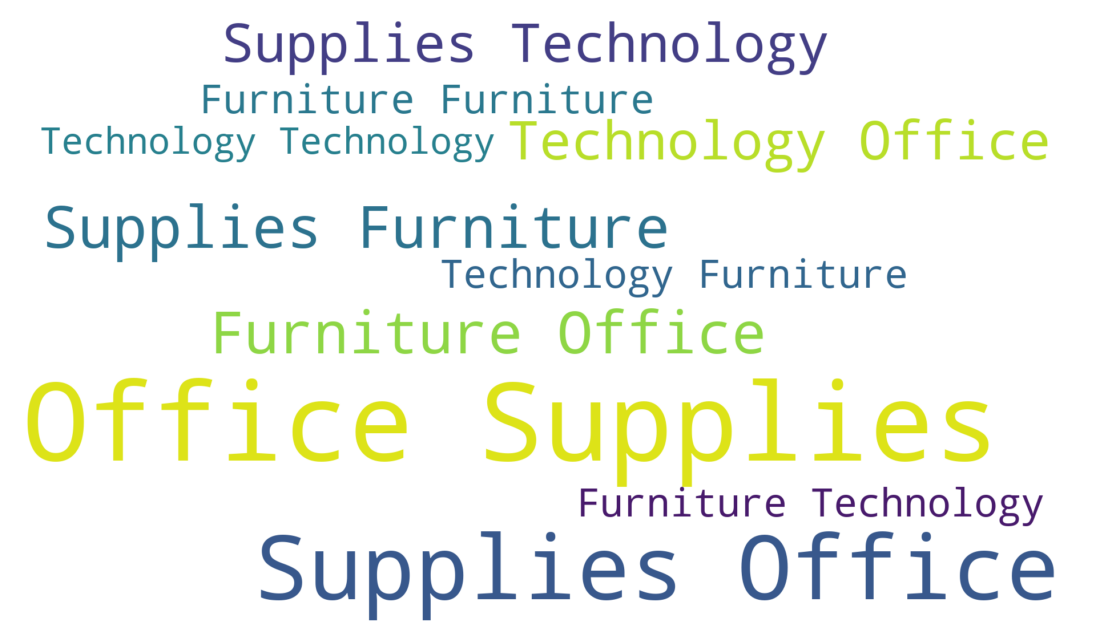

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.subplots(figsize=(20, 8))
wordcloud = WordCloud(background_color='white', width=1920, height=1080).generate(" ".join(df['Category']))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('cast.png')
plt.show()


<Axes: xlabel='Sales', ylabel='Profit'>

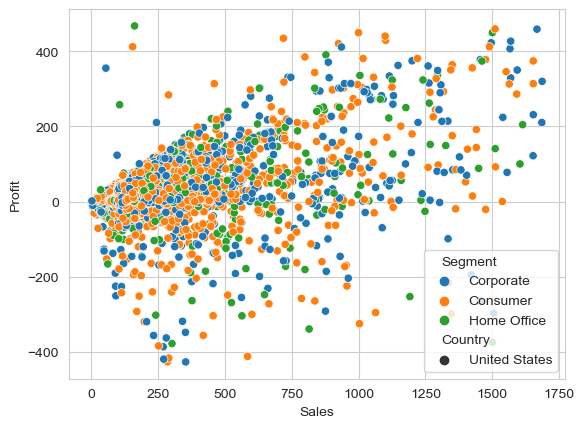

In [6]:
sns.scatterplot(data=df, x='Sales', y='Profit',hue='Segment',style='Country')

<Axes: xlabel='Returns', ylabel='Density'>

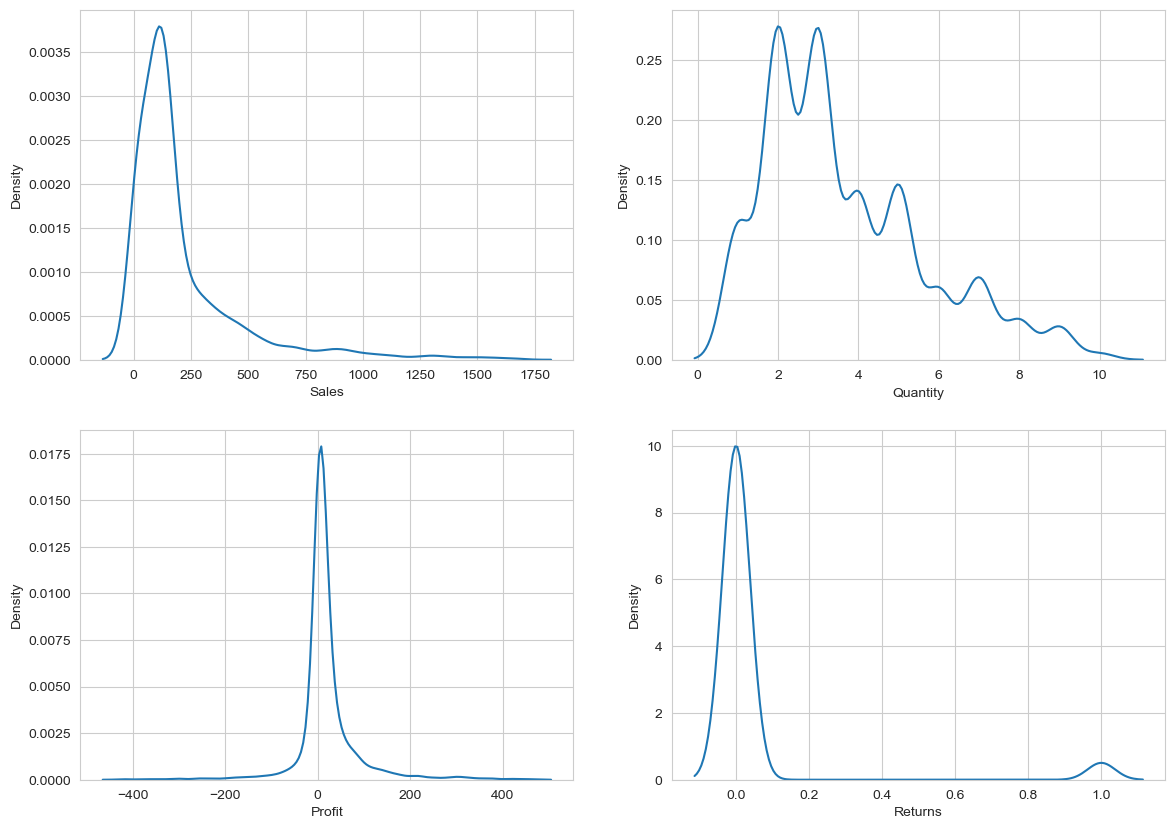

In [7]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,2,1)
sns.kdeplot(x='Sales',data=df)
plt.subplot(2,2,2)
sns.kdeplot(x='Quantity',data=df)
plt.subplot(2,2,3)
sns.kdeplot(x='Profit',data=df)
plt.subplot(2,2,4)
sns.kdeplot(x='Returns',data=df)

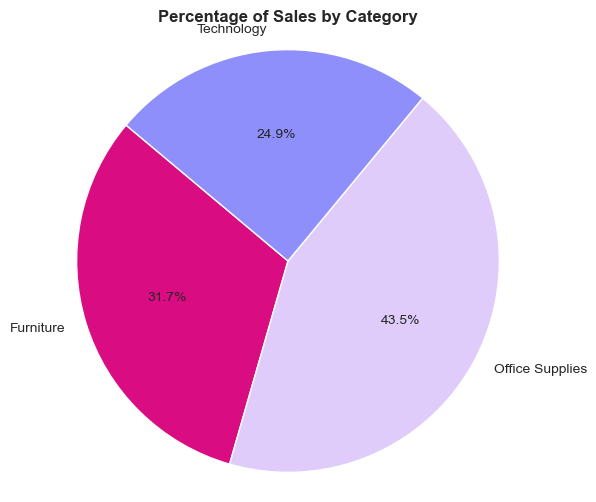

In [8]:
category_sales = df.groupby('Category')['Sales'].sum()

plt.figure(figsize=(6, 6))
colors = ['#DA0C81','#DFCCFB','#8E8FFA']
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Percentage of Sales by Category',fontweight='bold')
plt.axis('equal') 
plt.show()

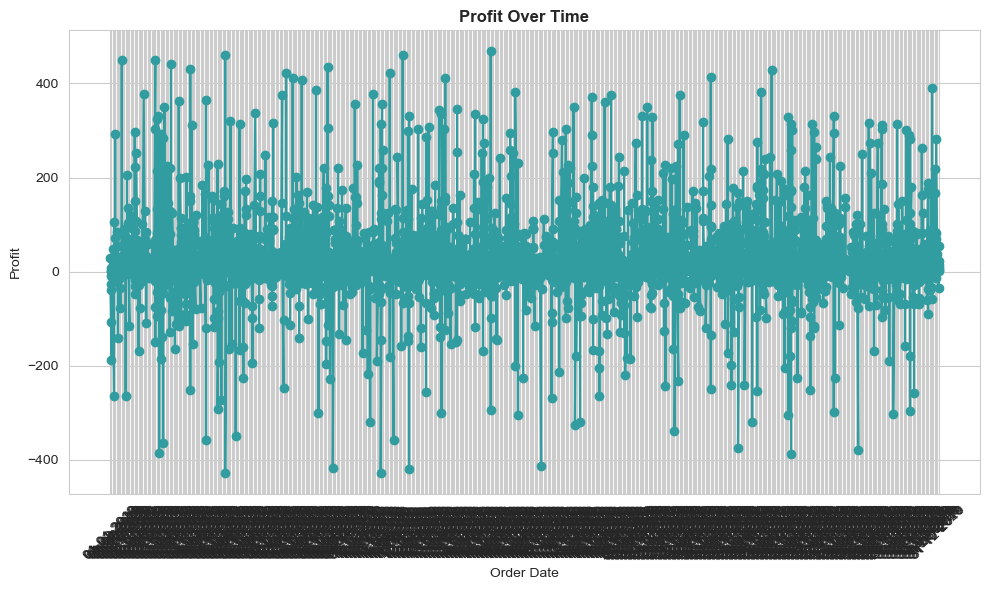

In [9]:
df.sort_values(by='Order Date', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df['Order Date'], df['Profit'], color='#319DA0', marker='o', linestyle='-')
plt.xlabel('Order Date')
plt.ylabel('Profit')
plt.title('Profit Over Time',fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

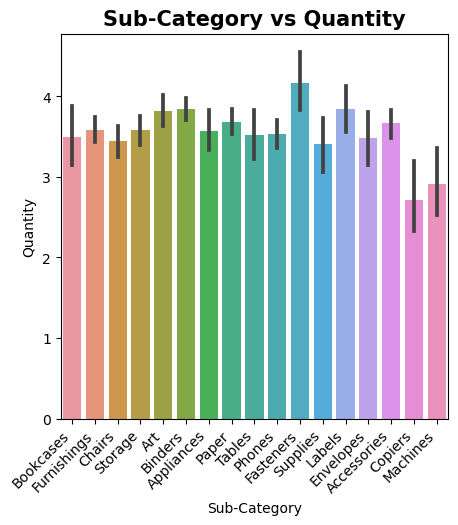

In [10]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Sub-Category", y="Quantity",data=df)
plt.title("Sub-Category vs Quantity",fontsize=15,fontweight='bold')
plt.xlabel("Sub-Category")
plt.ylabel("Quantity")
plt.xticks(rotation=45, ha='right')
plt.show()

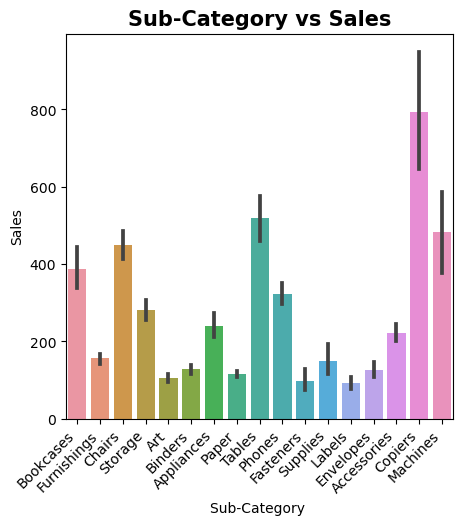

In [11]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Sub-Category", y="Sales", data=df)
plt.title("Sub-Category vs Sales",fontsize=15,fontweight='bold')
plt.xlabel("Sub-Category ")
plt.ylabel("Sales")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels(horizontal alignment)
plt.show()

### checking the variation of stock

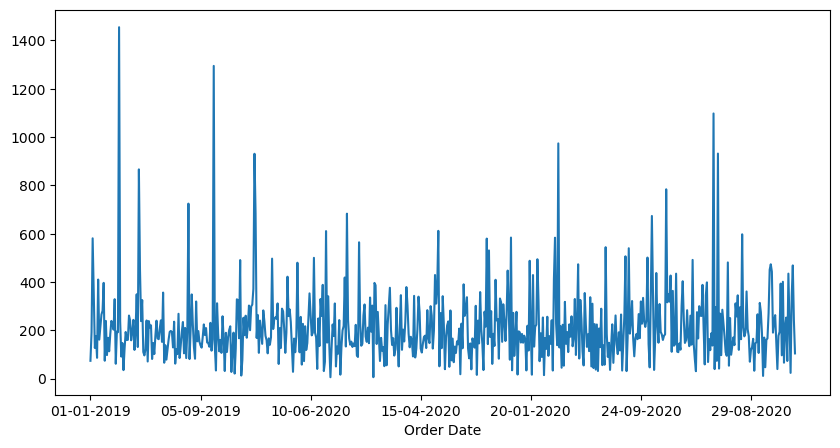

In [12]:
plt.figure(figsize=(10,5)) 
df.groupby('Order Date').mean()['Sales'].plot() 
plt.show()

In [13]:
df.corr()

,Row ID+O6G3A1:R6,Sales,Quantity,Profit,Returns
Row ID+O6G3A1:R6,1.000000,0.010623,0.011576,-0.009588,0.022644
Sales,0.010623,1.000000,0.179523,0.420135,0.027340
Quantity,0.011576,0.179523,1.000000,0.113817,0.007351
Profit,-0.009588,0.420135,0.113817,1.000000,0.010996
Returns,0.022644,0.027340,0.007351,0.010996,1.000000


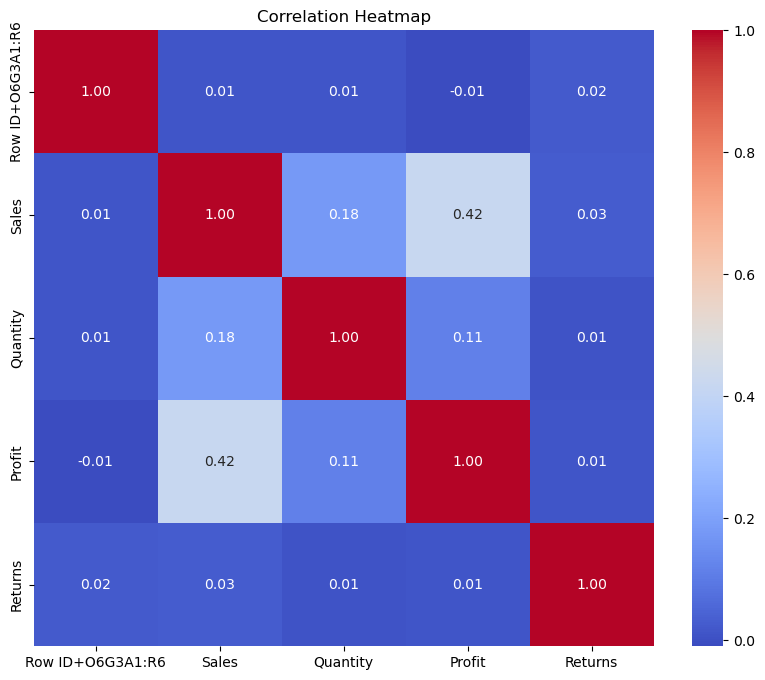

In [14]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [15]:
#lets find the categorialfeatures
list_1=list(df.columns)

In [16]:
list_cate=[]
for i in list_1:
    if df[i].dtype=='object':
        list_cate.append(i)

In [17]:
le=LabelEncoder()

In [18]:
for i in list_cate:
    df[i]=le.fit_transform(df[i])

In [19]:
df

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode
0,4918,932,0,138,3,90,103,1,0,135,...,1,44,0,4,373,73.940,1,28.2668,0,2
2588,8071,2110,1,92,3,378,339,0,0,179,...,0,205,0,9,1427,164.420,5,-187.3815,0,2
2589,8072,2110,1,92,3,378,339,0,0,179,...,0,96,0,5,1121,322.744,4,-26.6352,0,0
2590,8070,2110,1,92,3,378,339,0,0,179,...,0,1314,1,14,1268,472.560,5,-107.9580,0,0
2592,8073,2110,1,92,3,378,339,0,0,179,...,0,540,1,2,632,93.736,4,2.2288,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2582,1154,933,640,115,3,422,424,1,0,339,...,3,763,1,3,925,159.768,7,53.9217,0,0
2583,6342,2478,640,24,0,195,238,0,0,206,...,1,1309,1,14,1443,156.512,4,-35.2152,0,2
2584,4613,2666,640,115,3,270,254,0,0,186,...,2,462,1,2,1074,47.616,3,3.5712,0,2
2585,5739,861,640,115,3,99,75,0,0,368,...,3,777,1,3,654,38.376,3,13.4316,0,0


<h1 style="color:#982176;">Feature Engineering</h1>

In [20]:
X = df.drop(columns=['Sales'])  # Features
y = df['Sales']  # Target variable

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Linear Regression
print("Linear Regression:")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Mean Squared Error (Linear Regression):", mse_lr)
print("R^2 Score (Linear Regression):", r2_lr)

# Random Forest Regression
print("\nRandom Forest Regression:")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Mean Squared Error (Random Forest Regression):", mse_rf)
print("R^2 Score (Random Forest Regression):", r2_rf)

# Gradient Boosting Regression
print("\nGradient Boosting Regression:")
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print("Mean Squared Error (Gradient Boosting Regression):", mse_gb)
print("R^2 Score (Gradient Boosting Regression):", r2_gb)

# XGBoost Regression
print("\nXGBoost Regression:")
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("Mean Squared Error (XGBoost Regression):", mse_xgb)
print("R^2 Score (XGBoost Regression):", r2_xgb)

Linear Regression:
Mean Squared Error (Linear Regression): 49864.23156550106
R^2 Score (Linear Regression): 0.2246636713262662

Random Forest Regression:
Mean Squared Error (Random Forest Regression): 22741.110094060157
R^2 Score (Random Forest Regression): 0.6463996685252715

Gradient Boosting Regression:
Mean Squared Error (Gradient Boosting Regression): 24052.546091053173
R^2 Score (Gradient Boosting Regression): 0.6260082187971536

XGBoost Regression:
Mean Squared Error (XGBoost Regression): 21235.371908464793
R^2 Score (XGBoost Regression): 0.6698123128218112


<h1 style="color:#982176;">Model Evaluation</h1>

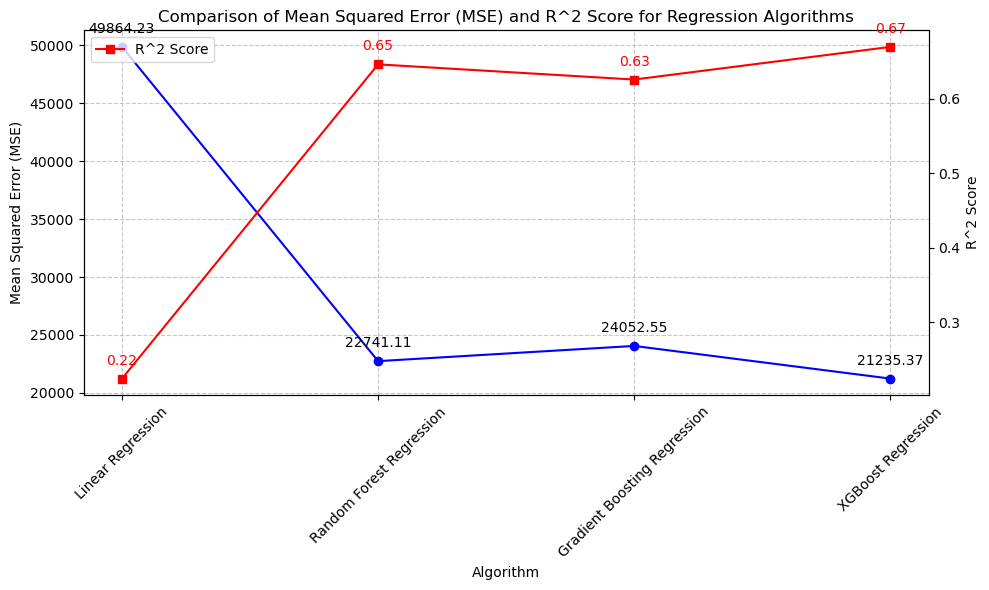

In [28]:
# List of algorithms and their corresponding MSE and R^2 score values
algorithms = ['Linear Regression', 'Random Forest Regression', 'Gradient Boosting Regression', 'XGBoost Regression']
mse_values = [49864.23156550106, 22741.110094060157, 24052.546091053173, 21235.371908464793]
r2_scores = [0.2246636713262662, 0.6463996685252715, 0.6260082187971536, 0.6698123128218112]

# Plot the line chart for MSE
plt.figure(figsize=(10, 6))
plt.plot(algorithms, mse_values, marker='o', linestyle='-', color='b', label='MSE')
plt.xlabel('Algorithm')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) and R^2 Score for Regression Algorithms')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Annotate each point with its MSE value
for i, mse in enumerate(mse_values):
    plt.annotate(f'{mse:.2f}', (algorithms[i], mse), textcoords="offset points", xytext=(0,10), ha='center')

# Create a second y-axis for R^2 score
plt.twinx()
plt.plot(algorithms, r2_scores, marker='s', linestyle='-', color='r', label='R^2 Score')
plt.ylabel('R^2 Score')
plt.xticks(rotation=45)

# Annotate each point with its R^2 score
for i, r2 in enumerate(r2_scores):
    plt.annotate(f'{r2:.2f}', (algorithms[i], r2), textcoords="offset points", xytext=(0,10), ha='center', color='r')

# Show plot
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


<h1 style="color:#982176;">Model Deployment</h1>

Mean Absolute Error (XGBoost Regression): 21235.371908464793
Root Mean Squared Error (XGBoost Regression): 0.6698123128218112


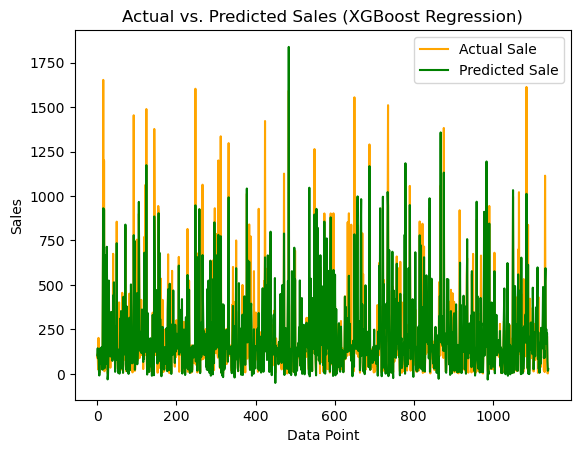

In [30]:
print("Mean Absolute Error (XGBoost Regression):", mse_xgb)
print("Root Mean Squared Error (XGBoost Regression):", r2_xgb)

# Plot actual vs. predicted sales
plt.plot(y_test.values, label='Actual Sale', color='orange')
plt.plot(y_pred_xgb, label='Predicted Sale', color='green')
plt.xlabel('Data Point')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales (XGBoost Regression)')
plt.legend()
plt.show()

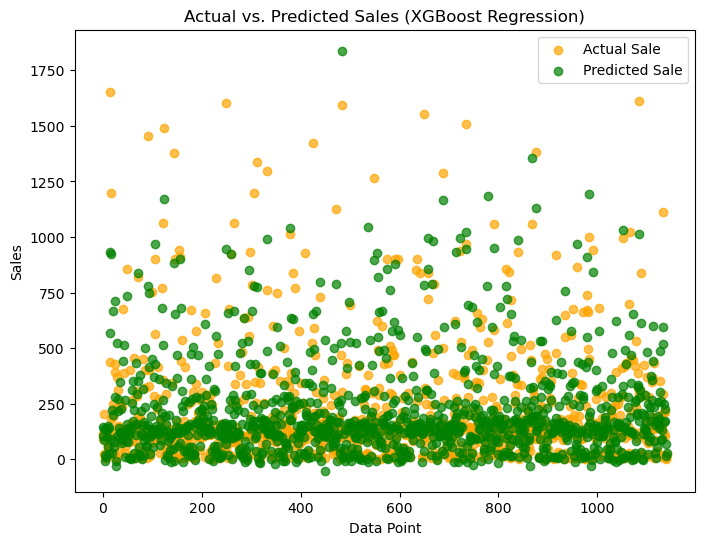

In [32]:
actual_sales = y_test.values
predicted_sales = y_pred_xgb

# Scatter plot for actual vs. predicted sales
plt.figure(figsize=(8, 6))
plt.scatter(range(len(actual_sales)), actual_sales, label='Actual Sale', color='orange', alpha=0.7)
plt.scatter(range(len(predicted_sales)), predicted_sales, label='Predicted Sale', color='green', alpha=0.7)
plt.xlabel('Data Point')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales (XGBoost Regression)')
plt.legend()
plt.show()
